### Yelp Review Analysis by Angela Shane and Anupam Lalwani

### Analysis topic:
Negative Yelp reviews can cause restaurants to close.

Assumptions before looking at the data:
- High correlation between closed restaurants and low ratings
- High negative vader Sentiment score for restaurant reviews

### Data Retrieval:

Yelp supports developers and students trying to do research on Yelp data with Yelp Fusion API. However, Yelp has put limits to the number of restaurants and reviews one can pull from its API.

We had to take a different route and retrieve data using data scrapping. 

The first step was to get URLs of closed restaurants listed on Yelp. The code for scrapping the data from google and getting a list of URLs of closed restaurants listed on Yelp is in the file [GoogleSearchResults.ipynb](https://github.com/anupamlalwani/YelpProject_UCB/blob/master/GoogleSearchResults.ipynb). The list of URLs was exported to [yelp_closed_biz.txt](https://github.com/anupamlalwani/YelpProject_UCB/blob/master/yelp_closed_biz.txt)

The second step was to scrape the Yelp reviews from each restaurant URL.  A restaurant can have many reviews spanning multiple pages.  We limited our data scraping to the first 3 pages of each restaurant, which is approximately 60 reviews per restaurant. The code for scrapping the data for restaurants is in the file [YelpReviews.ipnyb](https://github.com/anupamlalwani/YelpProject_UCB/blob/master/YelpReviews.ipynb). The final data was exported to [yelp_review_analysis.csv](https://github.com/anupamlalwani/YelpProject_UCB/blob/master/yelp_review_analysis.csv) 

The third step was to carry out analysis on acquired data. The code and charts below help us find out if our assumptions hold true or not.

In [2]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
# putting the data retrieved in step2 into a dataframe
yelp_df = pd.read_csv('yelp_review_analysis.csv',encoding='iso-8859-1')
yelp_df.head()

,compound,compound_by_sent,median_cmpd,median_neg,median_neu,median_pos,name,negative,negative_by_sent,neutral,...,positive_by_sent,range_cmpd_max,range_cmpd_min,range_neg_max,range_neg_min,range_neu_max,range_neu_min,range_pos_max,range_pos_min,rating
0,0.1346,0.0497,0.0000,0.000,0.858,0.000,Maxs Restaurants,0.0876,0.1100,0.8159,...,0.0783,0.7269,-0.4404,1.00,0.0,1.0,0.000,0.357,0.0,3.0
1,0.0624,0.0624,0.0000,0.061,0.808,0.115,Franceschis,0.0619,0.0619,0.8240,...,0.1142,0.7050,-0.4336,0.15,0.0,1.0,0.527,0.343,0.0,2.0
2,0.2836,0.2691,0.3182,0.000,0.799,0.149,Butterfly Restaurant,0.0483,0.0429,0.7384,...,0.1848,0.9546,-0.8377,1.00,0.0,1.0,0.000,1.000,0.0,3.5
3,0.1785,0.1455,0.0000,0.000,0.811,0.049,La Terrasse,0.0676,0.0690,0.7766,...,0.1410,0.9523,-0.9015,1.00,0.0,1.0,0.000,1.000,0.0,2.5
4,0.2955,0.2688,0.3818,0.000,0.814,0.180,Titas Restaurant,0.0560,0.0585,0.7835,...,0.1470,0.8550,-0.3818,1.00,0.0,1.0,0.000,0.610,0.0,3.0


### Charts and Analysis

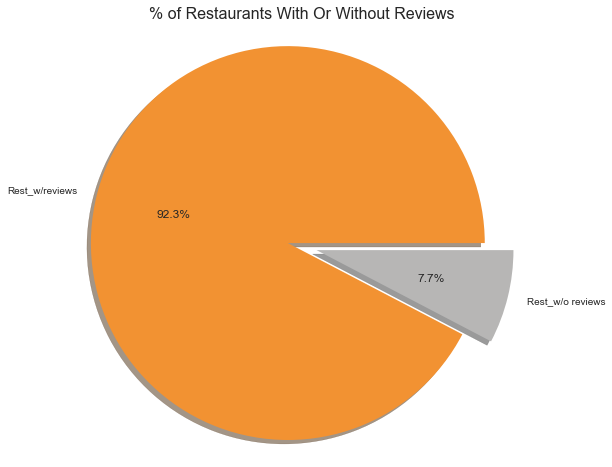

In [61]:
# number of restaurants having reviews out of total restaurant population
fig = plt.figure(figsize=(8, 8))
explode = (0.15,0)
portions = [len(yelp_df[yelp_df['num_reviews']>0]), len(yelp_df[yelp_df['num_reviews']<1])]
colors = ['#f29232', '#b7b6b5']
labels = ['Rest_w/reviews', 'Rest_w/o reviews']
plt.pie(portions, explode = explode,labels=labels, autopct='%1.1f%%', shadow=True, colors = colors)
plt.axis('equal')
plt.title('% of Restaurants With Or Without Reviews', fontsize = 16)
plt.show()

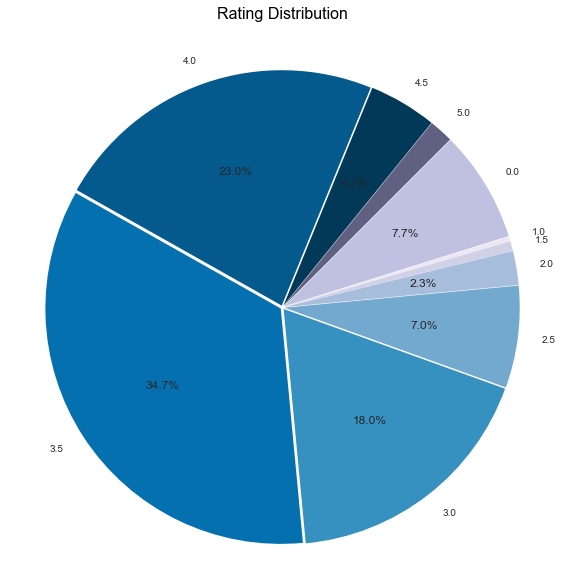

In [62]:
## Restaurants rating distribution - what % of restaurants have what ratings

def my_autopct(pct):
    return ('%.1f%%' % pct) if pct >= 2 else ''

fig = plt.figure(figsize=(8,8))
explode= (0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,)
portions = yelp_df.groupby('rating')['rating'].count()
colors = ["#c0c0e0","#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858", "#606080","#404060", "#604060"]
labels = portions.index
plt.pie(portions, colors=colors, labels=labels, startangle=45,explode=explode,counterclock=False, radius=1.2,labeldistance=1.10, autopct=my_autopct)
porcent = 100.*portions/portions.sum()

plt.axis('equal')
plt.title('Rating Distribution', y=1.05, fontsize = 16, color='black')
fig.tight_layout()
plt.show()

### Scatter plots
The scatter plots below use average sentiment scores calculated as follows:
- Paragraph value = Average Vader Sentiment score of sentences in a paragraph
- Review value = Average of Vader Sentiment score of paragraphs in a review
- Restaurant value = Average of Vader Sentiment score of all reviews for a restaurant

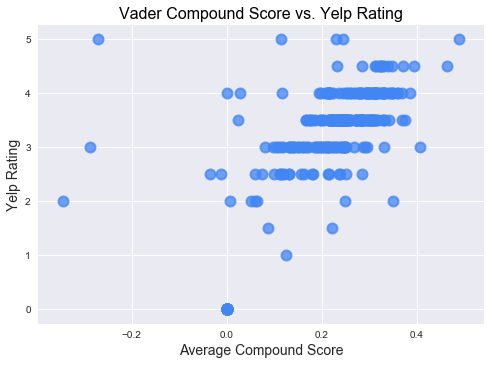

In [72]:
#scatter plot 1: compound score vs. yelp restaurant rating
fig = plt.figure()
plt.scatter(yelp_df['compound'], yelp_df['rating'], s=100, linewidths=2, alpha=0.75, color="#4286f4")
plt.xlabel('Average Compound Score', fontsize = 14)
plt.ylabel('Yelp Rating', fontsize = 14)
plt.title('Vader Compound Score vs. Yelp Rating', fontsize = 16, color='black')
sns.set()
plt.show()

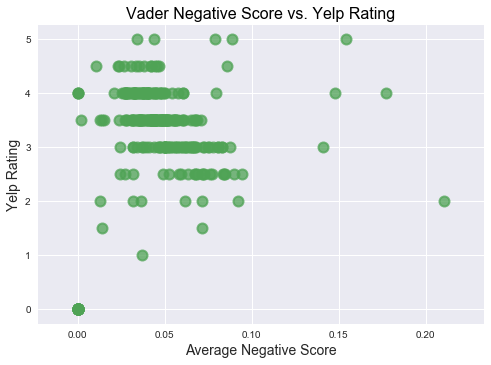

In [73]:
#scatter plot 2: negative score vs. yelp restaurant rating

plt.scatter(yelp_df['negative'], yelp_df['rating'], s=100, linewidths=2, alpha=0.75, color="#4fa355")
plt.xlabel('Average Negative Score',fontsize = 14)
plt.ylabel('Yelp Rating', fontsize = 14)
plt.title('Vader Negative Score vs. Yelp Rating', fontsize = 16, color = 'black')
sns.set()
plt.show()

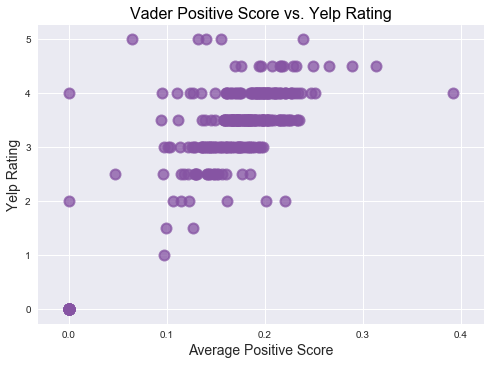

In [74]:
#scatter plot 3: positive score vs. yelp restaurant rating

plt.scatter(yelp_df['positive'], yelp_df['rating'], s=100, linewidths=2, alpha=0.75, color="#8654a3")
plt.xlabel('Average Positive Score', fontsize = 14)
plt.ylabel('Yelp Rating', fontsize = 14)
plt.title('Vader Positive Score vs. Yelp Rating',fontsize = 16, color = 'black')
sns.set()
plt.show()

### Scatter plots by sentences Vader Sentiment score

Since, we were not able to find any correlation or trend in the scatter plots above, we decided to see if getting rid of average of averages would help us find something interesting in the data. So, we came up with Restaurant value:

Restaurant value = Average of Vader Sentiment score of all the sentences from all the reviews

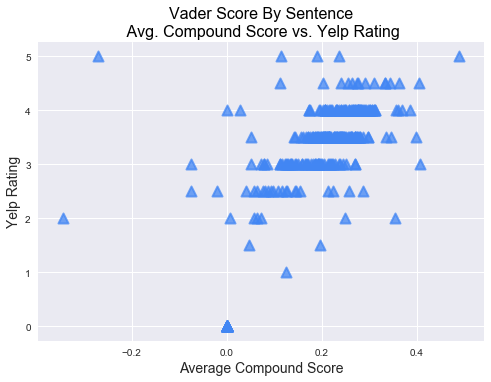

In [76]:
# scatter plot 4: compound score by sentence vs yelp rating
plt.scatter(yelp_df['compound_by_sent'], yelp_df['rating'], s=100, linewidths=2, alpha=0.75, color='#4286f4', marker="^")
plt.xlabel('Average Compound Score', fontsize = 14)
plt.ylabel('Yelp Rating', fontsize = 14)
plt.title('Vader Score By Sentence\n Avg. Compound Score vs. Yelp Rating',fontsize = 16, color = 'black')
sns.set()
plt.show()

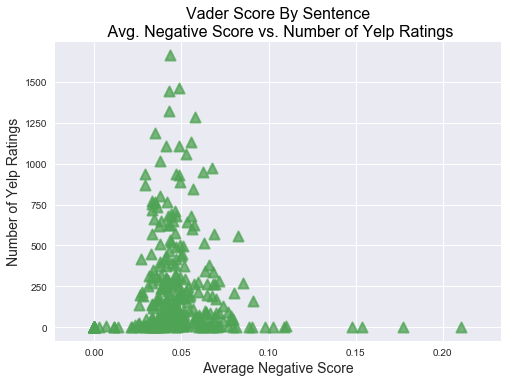

In [77]:
# scatter plot 5: negative score by sentence vs number of reviews
plt.scatter(yelp_df['negative_by_sent'], yelp_df['num_reviews'], s=100, linewidths=2, alpha=0.75, color='#4fa355', marker="^")
plt.xlabel('Average Negative Score', fontsize = 14)
plt.ylabel('Number of Yelp Ratings', fontsize = 14)
plt.title('Vader Score By Sentence\n Avg. Negative Score vs. Number of Yelp Ratings',fontsize = 16, color = 'black')
sns.set()
plt.show()
# does not matter the number of reviews, the negative scorer for most restaurants ranges frm 0-0.10

### Miscellaneous Scatter Plots

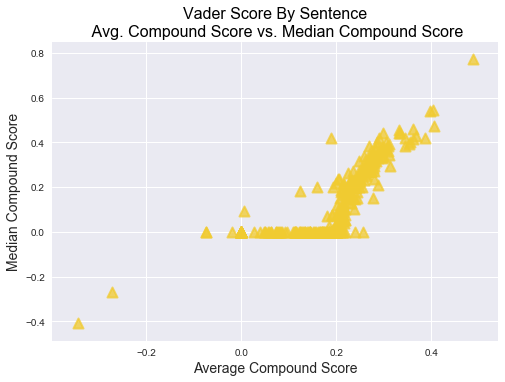

In [80]:
#scatter plot 6: compound score by sentence vs  median compound score by sentence
plt.figure()

plt.scatter(yelp_df['compound_by_sent'], yelp_df['median_cmpd'], s=100, linewidths=2, alpha=0.75, color='#f1cb31', marker="^")
plt.xlabel('Average Compound Score', fontsize = 14)
plt.ylabel('Median Compound Score', fontsize = 14)
plt.title('Vader Score By Sentence\n Avg. Compound Score vs. Median Compound Score',fontsize = 16, color = 'black')
sns.set()
plt.show()

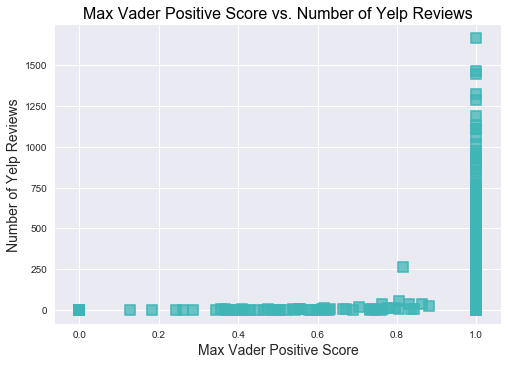

In [82]:
# scatter plot 7 : Max positive vader Score by sentence vs num of reviews 
# To see if numb of reviews are less, it skews the sentiment scores
plt.scatter(yelp_df['range_pos_max'], yelp_df['num_reviews'],  s=100, linewidths=2, alpha=0.75, color='#40b5b7', marker='s')
plt.xlabel('Max Vader Positive Score', fontsize = 14)
plt.ylabel('Number of Yelp Reviews', fontsize = 14)
plt.title('Max Vader Positive Score vs. Number of Yelp Reviews',fontsize = 16, color = 'black')
sns.set()
plt.show()
# The graph below shows that, the fewer the reviews (less than 100), the lower the max positive sentiment score

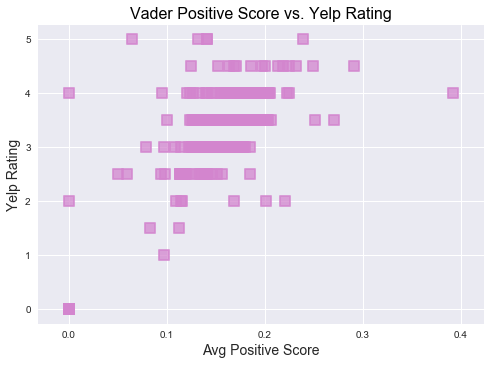

In [83]:
# scatter plot 8: positive score by sentence vs ratings
plt.scatter( yelp_df['positive_by_sent'], yelp_df['rating'],  s=100, linewidths=2, alpha=0.75, color='#d385ce', marker='s')
plt.ylabel('Yelp Rating', fontsize = 14)
plt.xlabel('Avg Positive Score', fontsize = 14)
plt.title('Vader Positive Score vs. Yelp Rating',fontsize = 16, color = 'black')
sns.set()
plt.show()
#the chart below shows that even though restaurants have low positive score it does not affect the rating

### Statistical Inference

In [134]:
#calculating correlation and p-value for negative score by sentence and number of reviews
negscore_corr = stats.pearsonr(yelp_df['negative_by_sent'], yelp_df['num_reviews'])
negscore_corr


(0.036960579892247575, 0.52365502945134201)

The output above suggests - The correlation between negative score and number of reviews of restaurants is only 0.03 which means there is no strong correlation. To top that, the p-value is 0.52 (p-value>0.5) which means correlation is not significant

In [84]:
#calculating pearson correlation and  p-value for max positive score by sentence and number of reviews
maxpos_corr = stats.pearsonr(yelp_df['range_pos_max'], yelp_df['num_reviews'])
maxpos_corr

(0.39782635452407639, 8.0994882554057922e-13)

The output above suggests that correlation is not so strong as correlation coefficient is only 0.39. Since the p-value is too low (p-value < 0.01), it suggests that there is high probabilty the data represents the population.

In [138]:
#calculating pearson correlation and p-value for positive score by sentence and rating
pos_corr = stats.pearsonr(yelp_df['positive_by_sent'], yelp_df['rating'])
pos_corr

(0.80155698780920925, 1.5813200908265016e-68)

The output above suggests that there is a high correlation between the positive score and restaurant ratings. Also the p-value is < 0.01 which proves the relationship is highly significant. This means higher positive review score can help build a higher Yelp rating (stars) for a restaurant

In [90]:
#calculating pearson correlation and p-value for negative score by sentence and rating
neg_corr = stats.pearsonr(yelp_df['negative_by_sent'], yelp_df['rating'])
neg_corr

(0.31423972044151272, 2.6733675572134901e-08)

The output above suggests that there is a low correlation between the negative score and restaurant rating. Also the p-value is < 0.01 which proves the relationship is highly significant, but correlation is not so strong. This does not prove that a higher negative score means a lower Yelp rating (stars) for a restaurant.

In [89]:
#calculating pearson correlation and p-value for number of reviews and rating
reviews_corr = stats.pearsonr(yelp_df['num_reviews'], yelp_df['rating'])
reviews_corr

(0.22358315662138931, 9.3849454881529676e-05)

The output above suggests that there is a low correlation between the number of reviews and restaurant rating. Also the p-value is < 0.01 which proves the relationship is highly significant, but correlation is not so strong. This does not prove that higher number of reviews means a higher Yelp rating (stars) for a restaurant.

### Conclusion
Negative reviews do not contribute to restaurants closing!
- There is no strong correlation between low Yelp ratings and closed restaurants.
- There is no strong correlation between high Vader Sentiment negative score and closed restaurants.



### Contributors
- Anupam Lalwani [GitHub](https://github.com/anupamlalwani)
- Angela Shane [GitHub](https://github.com/shanegela)

### Technologies
- Python
    - BeautifulSoup
    - Pandas
    - Vader Sentiment
    - Natural Language Toolkit
    - Numpy
    - Matplotlib
    - Seaborn
    - SciPy